In [1]:
from bokeh.io import output_file, show, output_notebook, save
from bokeh.layouts import column, row
import matplotlib.pyplot as plt
import pandas as pd
import mlflow
import numpy as np
%load_ext autoreload
%autoreload 2

savepoint = 'http://localhost:5010'
exp_name = 'FundusSegmentation'
mlflow.set_tracking_uri(savepoint)
df = mlflow.search_runs('10')

def filter_d(run):
    return run['tags.mlflow.runName'].split('IDRID')[0]+'IDRID'

df['Datasets'] = df[['tags.mlflow.runName']].apply(filter_d, axis=1)

df[df.run_id=='a2348ba735d145b885e819b83c4a9435']

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.Test_accuracy_macro_FGADR,metrics.Test_specificity_macro_FGADR,metrics.f1_macro,metrics.Test_precision_macro_FGADR,...,params.Dice,params.ignore_index,params.solver,params.pretrained,params.crop_size,params.batch_size,params.random_crop,params.n_classes,tags.mlflow.runName,Datasets
1,a2348ba735d145b885e819b83c4a9435,10,FINISHED,sftp://clement@m3202-10.demdgi.polymtl.ca/home...,2021-05-27 23:36:41.449000+00:00,2021-05-29 06:13:31.529000+00:00,NaN,NaN,0.459834,NaN,...,"{'eps': 1, 'mode': 'multilabel', 'smooth': 0.5}",-100,Adam,True,"[512, 512]",8,True,4,FGADR-Messidor-IDRID-HRNet,FGADR-Messidor-IDRID


In [2]:
import sys
sys.path.append('../../')
from experiment import RetinExp
from nntools.utils import Config

In [3]:
c = Config('../../config/config_idrid_messidor_fgadr.yaml')
c['Dataset']['shape'] = [1024, 1024]
c['Preprocessing']['random_crop'] = False
exp = RetinExp(c)

/store/usagers/clpla/NNTools/nntools/tracker/logger.py:11: UserWarning: Mismatch between the size of the different input folders (longer 54, smaller 26)
  warnings.warn(msg, UserWarning)
/store/usagers/clpla/NNTools/nntools/tracker/logger.py:11: UserWarning: Upsampling missing labels to fit the dataset's size (54)
  warnings.warn(msg, UserWarning)
/usagers/clpla/.conda/envs/torch18/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1851: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(
/store/usagers/clpla/NNTools/nntools/tracker/logger.py:11: UserWarning: Mismatch between the size of the different input folders (longer 27, smaller 14)
  warnings.warn(msg, UserWarning)
/store/usagers/clpla/NNTools/nntools/tracker/logger.py:11: UserWarning: Upsampling missing labels to fit the dataset's size (27)
  warnings.warn(msg, UserWarning)
/store/usagers/clpla/NNTools/nntools/tracker/logge

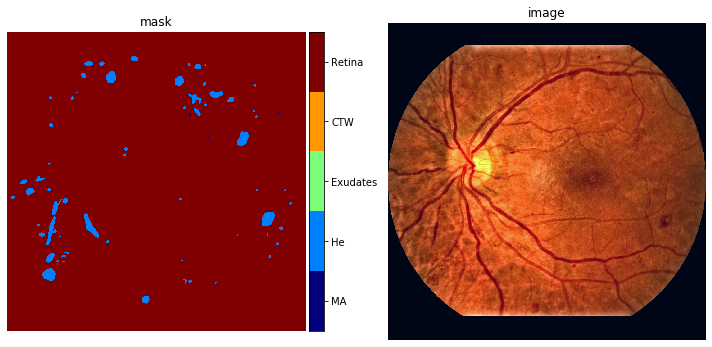

In [28]:
exp.train_dataset.datasets[2].plot(150, classes=['Retina', 'CTW', 'Exudates', 'He', 'MA'])

In [29]:
from timm.models import mobilenetv3_large_100_miil

In [7]:
model = mobilenetv3_large_100_miil(num_classes=4, in_chans=6)
model

MobileNetV3(
  (conv_stem): Conv2d(6, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): HardSwishMe()
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
        (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (se): Identity()
        (conv_pw): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequential(
      (0): InvertedResidual(
        (conv_pw): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr